In [1]:
import pybaseball as pyb
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
mlb_19=pd.read_csv('mlb_19.csv').drop('Unnamed: 0', axis=1)

In [72]:
mlb_19.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,count,next_count
0,FC,2019-09-29,91.1,-2.16,6.08,"Herrera, Kelvin",641513,516969,strikeout,swinging_strike,NaN,NaN,NaN,NaN,14.0,Travis Demeritte strikes out swinging.,R,R,R,CWS,DET,S,2.0,NaN,2,2,2019,-0.05,0.40,0.08,1.02,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,641470,NaN,NaN,5.659540,-132.261173,-7.523466,-1.822484,29.552101,-26.184787,3.34,1.64,NaN,NaN,NaN,89.9,2347.0,5.8,567343,516969,641470,572365,570560,660162,664901,650391,641553,641477,54.71,NaN,NaN,0.0,1.0,0.0,0.0,NaN,66,5,Cutter,5,3,3,5,3,5,3,5,Standard,Standard,187.0,0.011,-0.099,2-2,X
1,FC,2019-09-29,88.2,-2.22,6.07,"Herrera, Kelvin",641513,516969,NaN,foul,NaN,NaN,NaN,NaN,5.0,Travis Demeritte strikes out swinging.,R,R,R,CWS,DET,S,NaN,NaN,2,1,2019,0.19,0.46,0.16,2.29,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,641470,NaN,NaN,5.356255,-128.270061,-3.958404,0.855951,27.381318,-26.670237,3.50,1.64,10.0,66.6,-12.0,87.1,2366.0,5.7,567343,516969,641470,572365,570560,660162,664901,650391,641553,641477,54.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,4,Cutter,5,3,3,5,3,5,3,5,Standard,Standard,158.0,0.000,-0.033,2-1,2-2
2,FF,2019-09-29,95.8,-1.55,6.41,"Herrera, Kelvin",641513,516969,NaN,ball,NaN,NaN,NaN,NaN,11.0,Travis Demeritte strikes out swinging.,R,R,R,CWS,DET,B,NaN,NaN,1,1,2019,-0.90,1.42,-1.57,2.78,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,641470,NaN,NaN,1.949929,-139.338956,-7.096962,-12.028052,30.328764,-12.541891,3.27,1.64,NaN,NaN,NaN,95.2,2235.0,5.9,567343,516969,641470,572365,570560,660162,664901,650391,641553,641477,54.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,3,4-Seam Fastball,5,3,3,5,3,5,3,5,Standard,Standard,212.0,0.000,0.024,1-1,2-1
3,FC,2019-09-29,90.1,-2.16,6.01,"Herrera, Kelvin",641513,516969,NaN,ball,NaN,NaN,NaN,NaN,13.0,Travis Demeritte strikes out swinging.,R,R,R,CWS,DET,B,NaN,NaN,0,1,2019,0.14,0.35,-0.06,0.95,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,641470,NaN,NaN,4.867683,-130.869340,-7.192694,0.460072,28.163834,-26.922956,3.34,1.64,NaN,NaN,NaN,88.7,2335.0,5.6,567343,516969,641470,572365,570560,660162,664901,650391,641553,641477,54.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,2,Cutter,5,3,3,5,3,5,3,5,Standard,Standard,159.0,0.000,0.012,0-1,1-1
4,FF,2019-09-29,98.2,-1.47,6.24,"Herrera, Kelvin",641513,516969,NaN,called_strike,NaN,NaN,NaN,NaN,5.0,Travis Demeritte strikes out swinging.,R,R,R,CWS,DET,S,NaN,NaN,0,0,2019,-0.34,1.17,-0.21,2.78,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,641470,NaN,NaN,4.226199,-142.841106,-6.628930,-5.683070,32.358288,-14.785764,3.48,1.64,NaN,NaN,NaN,98.5,2216.0,6.4,567343,516969,641470,572365,570560,660162,664901,650391,641553,641477,54.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,1,4-Seam Fastball,5,3,3,5,3,5,3,5,Standard,Standard,196.0,0.000,-0.019,0-0,0-1


In [3]:
kershaw_id = 477132
ryu_id = 547943

In [4]:
mlb_19 = mlb_19[mlb_19['balls']!=4]
mlb_19['count']=mlb_19['balls'].astype('str')+'-'+mlb_19['strikes'].astype('str')
mlb_19['next_count']=mlb_19['count'].shift(1)

mlb_19['next_count'] = np.where(mlb_19['events'].isnull(), mlb_19['next_count'], 'X')
mlb_19['next_count'] = np.where(mlb_19['next_count']=='0-0', 'X', mlb_19['next_count'])

In [5]:
ryu = mlb_19[mlb_19['pitcher']==ryu_id]

ryu = ryu[ryu['next_count']!='0-0']

In [6]:
count = ryu.groupby(['count', 'next_count'])['pitch_type'].count()
count_pct = count.groupby(level=0).apply(lambda x: x / float(x.sum()))
count_prob = count_pct.reset_index().rename(columns={'pitch_type': 'probability'})

count_list = np.array(count_prob['count'].unique())
d = {'count': count_list, 'next_count': ['0-0']*12, 'probability': [0]*12}
df = pd.DataFrame(data=d)

count_prob = pd.concat([count_prob, df])

In [26]:
count_t = mlb_19.groupby(['count', 'next_count'])['pitch_type'].count()
count_pct_t = count_t.groupby(level=0).apply(lambda x: x / float(x.sum()))
count_prob_t = count_pct_t.reset_index().rename(columns={'pitch_type': 'probability'})

count_list_t = np.array(count_prob_t['count'].unique())
d_t = {'count': count_list_t, 'next_count': ['0-0']*12, 'probability': [0]*12}
df_t = pd.DataFrame(data=d_t)

count_prob_t = pd.concat([count_prob_t, df_t])

In [66]:
pivot_table = count_prob.pivot(index='count', columns='next_count', values='probability').fillna(0)
pivot_table

last_row = [0]*12 + [1]
table = pivot_table.append(pivot_table.iloc[-1])
table.iloc[-1] = last_row

cols = [col for col in pivot_table]
table.index=cols
P = table

In [67]:
pivot_table_t = count_prob_t.pivot(index='count', columns='next_count', values='probability').fillna(0)

last_row_t = [0]*12 + [1]
table_t = pivot_table_t.append(pivot_table_t.iloc[-1])
table_t.iloc[-1] = last_row_t

cols_t = [cols_t for cols_t in pivot_table_t]
table_t.index=cols_t
P_t = table_t

In [71]:
P01 = P.loc['1-0'].reset_index().rename(columns={'1-0': 'ryu'}).sort_values(by='ryu',ascending=False)
P01_t = P_t.loc['1-0'].reset_index().rename(columns={'1-0': 'mlb_avg'}).sort_values(by='mlb_avg',ascending=False)

round(pd.merge(P01, P01_t, on='next_count'),4)

,next_count,ryu,mlb_avg
0,1-1,0.5893,0.5009
1,2-0,0.2786,0.3426
2,X,0.1321,0.1565
3,0-0,0.0000,0.0000
4,0-1,0.0000,0.0000
5,0-2,0.0000,0.0000
6,1-0,0.0000,0.0000
7,1-2,0.0000,0.0000
8,2-1,0.0000,0.0000
9,2-2,0.0000,0.0000


In [42]:
P00 = P.loc['0-0'].reset_index().rename(columns={'0-0': 'ryu'}).sort_values(by='ryu',ascending=False)
P00_t = P_t.loc['0-0'].reset_index().rename(columns={'0-0': 'mlb_avg'}).sort_values(by='mlb_avg',ascending=False)

round(pd.merge(P00, P00_t, on='next_count'),4)

,next_count,ryu,mlb_avg
0,0-1,0.5285,0.5036
1,1-0,0.3394,0.3871
2,X,0.1321,0.1093
3,0-0,0.0000,0.0000
4,0-2,0.0000,0.0000
5,1-1,0.0000,0.0000
6,1-2,0.0000,0.0000
7,2-0,0.0000,0.0000
8,2-1,0.0000,0.0000
9,2-2,0.0000,0.0000


In [44]:
P_2 = P@P
P_2_t = P_t@P_t
P_2_ryu = P_2.loc['0-0'].sort_values(ascending=False).reset_index().rename(columns={'next_count': '2_next_count', '0-0': 'ryu'})
P_2_avg = P_2_t.loc['0-0'].sort_values(ascending=False).reset_index().rename(columns={'next_count': '2_next_count', '0-0': 'mlb_avg'})

round(pd.merge(P_2_ryu, P_2_avg, on='2_next_count'), 4)

,2_next_count,ryu,mlb_avg
0,1-1,0.4097,0.4017
1,X,0.2691,0.2545
2,0-2,0.2267,0.2112
3,2-0,0.0945,0.1326
4,0-0,0.0000,0.0000
5,0-1,0.0000,0.0000
6,1-0,0.0000,0.0000
7,1-2,0.0000,0.0000
8,2-1,0.0000,0.0000
9,2-2,0.0000,0.0000


In [43]:
P_3 = P@P@P
P_3_t = P_t@P_t@P_t
P_3_ryu = P_3.loc['0-0'].sort_values(ascending=False).reset_index().rename(columns={'next_count': '3_next_count', '0-0': 'ryu'})
P_3_avg = P_3_t.loc['0-0'].sort_values(ascending=False).reset_index().rename(columns={'next_count': '3_next_count', '0-0': 'mlb_avg'})

round(pd.merge(P_3_ryu, P_3_avg, on='3_next_count'), 4)

,3_next_count,ryu,mlb_avg
0,X,0.4672,0.4339
1,1-2,0.2780,0.2760
2,2-1,0.1782,0.2100
3,0-2,0.0488,0.0394
4,3-0,0.0279,0.0406
5,0-0,0.0000,0.0000
6,0-1,0.0000,0.0000
7,1-0,0.0000,0.0000
8,1-1,0.0000,0.0000
9,2-0,0.0000,0.0000


In [62]:
Q = P.iloc[:12, :12]
I = np.eye(12)
e = np.linalg.inv(I-Q)
columns = Q.columns
index = Q.index
E = pd.DataFrame(e, columns=columns, index=index)

In [65]:
E.loc['0-0'].sum()

3.8308499247854315

In [47]:
Q_t = P_t.iloc[:12, :12]
e_t = np.linalg.inv(I-Q_t)
columns_t = Q_t.columns
index_t = Q_t.index
E_t = pd.DataFrame(e_t, columns=columns_t, index=index_t)

In [51]:
E_00 = E.loc['0-0']
E_00_t = E_t.loc['0-0']

E_00_ryu = E_00.reset_index().rename(columns={'next_count': 'count', '0-0': 'ryu_avg'}).sort_values(by='ryu_avg', ascending=False)
E_00_mlb = E_00_t.reset_index().rename(columns={'next_count': 'count', '0-0': 'mlb_avg'}).sort_values(by='mlb_avg', ascending=False)

pd.merge(E_00_ryu, E_00_mlb, on='count')

,count,ryu_avg,mlb_avg
0,0-0,1.000000,1.000000
1,0-1,0.528485,0.503596
2,1-1,0.409697,0.401723
3,1-2,0.405702,0.378883
4,1-0,0.339394,0.387088
5,2-2,0.308280,0.329606
6,0-2,0.288817,0.259713
7,3-2,0.186839,0.201709
8,2-1,0.178182,0.210024
9,2-0,0.094545,0.132604


In [53]:
q_pitcher_stat = pyb.pitching_stats(2019)
q_pitcher_fid = np.array(q_pitcher_stat['IDfg'])
q_pitcher_id = np.array(pyb.playerid_reverse_lookup(q_pitcher_fid, key_type='fangraphs')['key_mlbam'])

In [54]:
q_pitcher_fid

array([13125, 10954,  2520,  3137,  8700,  4676, 10131, 19427,  1943,
       15474, 19374, 14444,  9323, 17479, 10310, 12768, 14168, 11762,
       15689, 10021, 12049, 18383, 13431, 13164,  2036, 15467, 11423,
       16149, 15038, 12970,  5524, 15764, 12703, 15440, 13743,  8362,
        4930, 13050, 13074,  3284, 16400,  9803, 11486, 18684, 15734,
        2233,  1994, 19320,  8779,  8223,  8753, 11156,  6902,  2717,
        7754,  6797,  3254, 13774, 13619, 19206, 10130], dtype=int64)

In [55]:
q_pitcher_df = mlb_19[mlb_19['pitcher'].isin(q_pitcher_id)]

In [56]:
test = pd.DataFrame()

for i in q_pitcher_id:

    player = mlb_19[mlb_19['pitcher']==i]
    player = player[player['next_count']!='0-0']

    count = player.groupby(['count', 'next_count'])['pitch_type'].count()
    count_pct = count.groupby(level=0).apply(lambda x: x / float(x.sum()))
    count_prob = count_pct.reset_index().rename(columns={'pitch_type': 'probability'})

    count_list = np.array(count_prob['count'].unique())
    d = {'count': count_list, 'next_count': ['0-0']*12, 'probability': [0]*12}
    df = pd.DataFrame(data=d)

    count_prob = pd.concat([count_prob, df])

    pivot_table = count_prob.pivot(index='count', columns='next_count', values='probability').fillna(0)
    pivot_table

    last_row = [0]*12 + [1]
    table = pivot_table.append(pivot_table.iloc[-1])
    table.iloc[-1] = last_row

    cols = [col for col in pivot_table]
    table.index=cols
    P = table

    Q = P.iloc[:12, :12]
    I = np.eye(12)
    e = np.linalg.inv(I-Q)
    columns = Q.columns
    index = Q.index
    E = pd.DataFrame(e, columns=columns, index=index)

    E_00 = E.loc['0-0']
    E_00 = E_00.reset_index().rename(columns={'next_count': 'count', '0-0': 'average'})
    E_00['player_name'] = player['player_name'].iloc[0]
    
    test = pd.concat([test, E_00])

In [58]:
test[(test['average']>0.6)&(test['count']!='0-0')]

,count,average,player_name
1,0-1,0.625181,"Scherzer, Max"


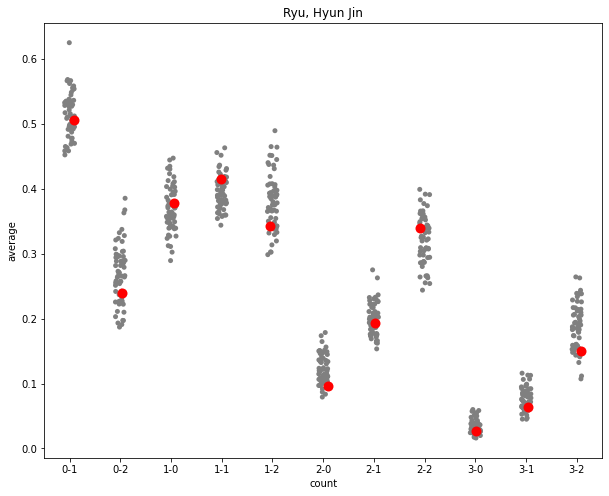

In [59]:
ryu = test[test['player_name'] == 'Ryu, Hyun Jin']
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(data=test[test['count']!='0-0'], x='count', y='average', color='gray')
ax = sns.stripplot(data=ryu[ryu['count']!='0-0'], x='count', y='average', color='red', s=10)
plt.title('Ryu, Hyun Jin')
plt.show()

In [23]:
test['player_name'].unique()

array(['Alcantara, Sandy', 'Anderson, Brett', 'Bailey, Homer',
       'Bauer, Trevor', 'Berríos, José', 'Bieber, Shane', 'Boyd, Matthew',
       'Buehler, Walker', 'Bumgarner, Madison', 'Castillo, Luis',
       'Cole, Gerrit', 'Corbin, Patrick', 'Darvish, Yu', 'deGrom, Jacob',
       'DeSclafani, Anthony', 'Eflin, Zach', 'Fiers, Mike',
       'Flaherty, Jack', 'Fried, Max', 'Giolito, Lucas',
       'Gonzales, Marco', 'Gray, Sonny', 'Greinke, Zack',
       'Hendricks, Kyle', 'Hudson, Dakota', 'Junis, Jakob',
       'Keller, Brad', 'Kelly, Merrill', 'Kershaw, Clayton',
       'Leake, Mike', 'Lester, Jon', 'López, Reynaldo', 'Lucchesi, Joey',
       'Lynn, Lance', 'Márquez, Germán', 'Mikolas, Miles', 'Miley, Wade',
       'Minor, Mike', 'Morton, Charlie', 'Musgrove, Joe', 'Nola, Aaron',
       'Nova, Iván', 'Pérez, Martín', 'Porcello, Rick', 'Quintana, José',
       'Ray, Robbie', 'Roark, Tanner', 'Rodriguez, Eduardo',
       'Ryu, Hyun Jin', 'Samardzija, Jeff', 'Sánchez, Aníbal',
       

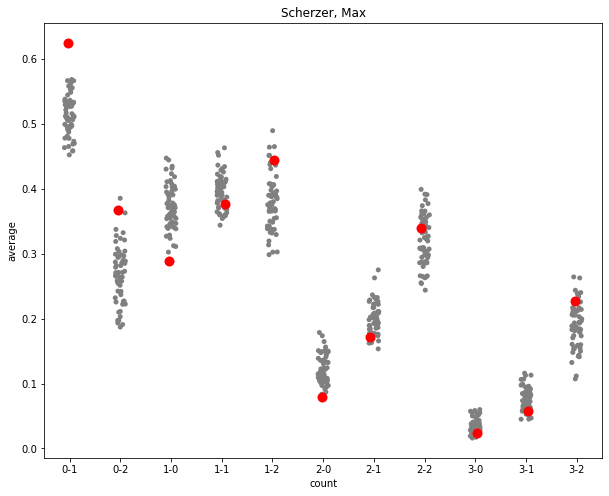

In [60]:
zack = test[test['player_name'] == 'Scherzer, Max']
other = test[test['player_name'] != 'Scherzer, Max']
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(data=other[(other['count']!='0-0')], x='count', y='average', color='gray')
ax = sns.stripplot(data=zack[zack['count']!='0-0'], x='count', y='average', color='red', s=10)
plt.title('Scherzer, Max')
plt.show()

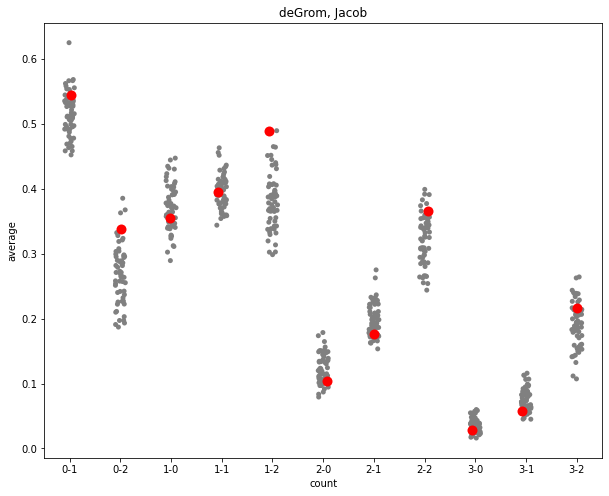

In [25]:
charlie = test[test['player_name'] == 'deGrom, Jacob']
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.stripplot(data=test[test['count']!='0-0'], x='count', y='average', color='gray')
ax = sns.stripplot(data=charlie[charlie['count']!='0-0'], x='count', y='average', color='red', s=10)
plt.title('deGrom, Jacob')
plt.show()